# spaceNNtime in simulated experiments

In this notebook I run spaceNNtime in a example as a demonstration and later analise other experiments

<a name="AADRHome4"></a>

## Contents

0. [ Library and packages ](#AADRLib)
1. [ Functions ](#AADRFun)
    + 1. [Python Functions](#AADRPyf)
    + 2. [R Functions](#AADRRfu)
2. [ spaceNNtime results in simulations ](#AADRExp)
    + 1. [Presentation of experiment simulated data](#AADRPrs)
    + 2. [Analise results](#AADRAna)
        - Correlation true vs predicted
        - Error
        - Plots
   
<a name="AADRLib"></a>
## 0. Library and packages

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"


In [4]:
%%R
.libPaths(c("/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"))

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(slendr)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Linking to GEOS 3.7.2, GDAL 3.0.4, PROJ 6.3.2; sf_use_s2() is TRUE

R[write to console]: You can setup a pre-configured environment with all of slendr's Python
tree-sequence dependencies (Python modules tskit, pyslim, and msprime)
by running the function setup_env().



In [5]:
#%%R
#
#gg_color_hue <- function(n) {
#  hues = seq(15, 375, length = n + 1)
#  hcl(h = hues, l = 65, c = 100)[1:n]
#}
#
#colors = gg_color_hue(6)
#col_pop = c("ALL" = "black",
#            "AFR" = colors[1], "OOA" = colors[2], "EHG" = colors[3],
#            "ANA" = colors[4], "EUR" = colors[5], "YAM" = colors[6])


In [6]:
%%R
.libPaths()

[1] "/maps/projects/racimolab/people/qxz396/spaceNNtime/backup/environments/renv/library/R-4.1/x86_64-redhat-linux-gnu"
[2] "/maps/projects/racimolab/people/qxz396/miniconda3/envs/sNNt_slendr/lib/R/library"                                 



[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRFun"></a>
## 1. Functions

<a name="AADRPfu"></a>
### A. Python Functions

<a name="AADRRfu"></a>
### B. R Functions

In [7]:
%%R

rad <- function(x){
    (x * 180)/pi
}

haversine <- function(lat1, lon1, lat2, lon2){
    R = 6371  # radius of Earth in km
    
    phi_1 = lat1 * pi/180
    phi_2 = lat2 * pi/180
    del_phi = (lat2-lat1)* pi/180
    del_lam = (lon2-lon1)* pi/180
    
    a = (sin(del_phi/2)^2) + cos(phi_1) * cos(phi_2) * (sin(del_lam/2)^2)
    
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    round(R * c, 3)
}

In [8]:
%%R

data.frame(lat_true = c(41.507483, 51.510357),
           lon_true = c(-99.436554, -0.116773),
           lat_pred = c(38.504048, 38.889931),
           lon_pred = c(-98.315949, -77.009003)) %>%
    mutate(diff = haversine(lat_true, lon_true, lat_pred, lon_pred))

  lat_true   lon_true lat_pred  lon_pred     diff
1 41.50748 -99.436554 38.50405 -98.31595  347.328
2 51.51036  -0.116773 38.88993 -77.00900 5897.658



[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRExp"></a>
## 2. spaceNNtime results in the AADR dataset

<a name="AADRPrs"></a>
### A. Presentation of experiments ran

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [13]:
%%R

read.csv("../../files/experiments_AADR.csv", sep = ";")

   exp       nam met cro      sta       end          dmt  pre typ  los  nfe
1    1      loss   1   1 10000000  20000000 Direct,Known sNNt  gt hdtd None
2    2   general   1   1 10000000  20000000 Direct,Known sNNt  gt hdtd None
3    3      loss   1   1 10000000  20000000 Direct,Known sNNt  gt hdtd None
4    2    window   1   1        0  10000000 Direct,Known sNNt  gt hdtd None
5    2    window   1   1 20000000  30000000 Direct,Known sNNt  gt hdtd None
6    2    window   1   1 30000000  40000000 Direct,Known sNNt  gt hdtd None
7    2    window   1   1 40000000  50000000 Direct,Known sNNt  gt hdtd None
8    2    window   1   1 50000000  60000000 Direct,Known sNNt  gt hdtd None
9    2    window   1   1 60000000  70000000 Direct,Known sNNt  gt hdtd None
10   2    window   1   1 70000000  80000000 Direct,Known sNNt  gt hdtd None
11   2    window   1   1 80000000  90000000 Direct,Known sNNt  gt hdtd None
12   2    window   1   1 90000000 100000000 Direct,Known sNNt  gt hdtd None
13   4 allwi


[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRAna"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [10]:
%%R

read.table("../../sandbox/AADR/2/pred_1_10000000_20000000.txt", header = T) %>%
    head()

   sim exp     nam typ gro        ind  idx  snp     run true_lat  true_lon
1 AADR   2 general  gt   0     KNE003  554 4463 4.43607 50.11928  14.26706
2 AADR   2 general  gt   0     I15978  834 4463 4.43607 18.45100 -69.68600
3 AADR   2 general  gt   0     I10266 1872 4463 4.43607 32.58472  35.01694
4 AADR   2 general  gt   1     I13710 1011 4463 4.43288 51.36030   1.34050
5 AADR   2 general  gt   1     I20071 2468 4463 4.43288 46.96322  28.70845
6 AADR   2 general  gt   1 TU905_SX18 3757 4463 4.43288 47.45000   9.29200
  pred_lat  pred_lon diff_space true_tim pred_tim   diff_time
1 52.10081 19.552681   429.6173     3971 4467.937  -496.93701
2 48.64272  6.535088  7476.9210      959 3600.830 -2641.83032
3 42.71340 53.147240  1946.7434     3462 3555.032   -93.03223
4 35.51691 -1.828742  1779.7538     3252 2983.171   268.82935
5 38.73061 17.253090  1305.1613     2749 3662.817  -913.81665
6 45.06565 15.578653   551.0294     2032 3886.356 -1854.35596


In [11]:
%%R

read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
    select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2) %>%
    head()

                   ind datmea datstd  countr        source   covera snps12
1 s19_0LS03_1_noUDG.SG    740     17 Estonia       Shotgun 0.059112  57560
2 s19_0LS09_1_noUDG.SG   2389     52 Estonia       Shotgun 0.009124   8405
3 s19_0LS10_1_noUDG.SG   2609     82 Estonia       Shotgun 0.265721 233933
4 s19_0LS11_1_noUDG.SG   2918     47 Estonia       Shotgun 0.180211 164551
5            11KBM1.SG   3693     57   China       Shotgun       .. 106797
6    18R21262_noUDG.EC   5050    173   China Exome.capture 0.090919  25884
  assess warnin  datme2
1   PASS     .. Context
2   PASS     ..  Direct
3   PASS     ..  Direct
4   PASS     ..  Direct
5   PASS     ..  Direct
6   PASS     .. Context


In [18]:
%%R -w 1000 -h 1250

read.table("../../sandbox/AADR/2/pred_1_10000000_20000000.txt", header = T) %>%
#read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>%
    select(-c(diff_time, diff_space)) %>%
    gather("stat", "value", c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>% 
    separate(stat, c("truepred", "stat"), sep = "_") %>%
    left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2), by = c("ind")) %>% 
    mutate(truepred = factor(truepred, levels = c("true", "pred"))) -> df
    
df %>%
    head()

   sim exp     nam typ gro        ind  idx  snp     run truepred stat    value
1 AADR   2 general  gt   0     KNE003  554 4463 4.43607     true  lat 50.11928
2 AADR   2 general  gt   0     I15978  834 4463 4.43607     true  lat 18.45100
3 AADR   2 general  gt   0     I10266 1872 4463 4.43607     true  lat 32.58472
4 AADR   2 general  gt   1     I13710 1011 4463 4.43288     true  lat 51.36030
5 AADR   2 general  gt   1     I20071 2468 4463 4.43288     true  lat 46.96322
6 AADR   2 general  gt   1 TU905_SX18 3757 4463 4.43288     true  lat 47.45000
  datmea datstd              countr source   covera snps12 assess
1   3971     51     Czech__Republic  1240K 1.900021 779195   PASS
2    959     32 Dominican__Republic  1240K 2.504798 721357   PASS
3   3462     62              Israel  1240K 0.215713 203141   PASS
4   3252     59     United__Kingdom  1240K 0.239629 230342   PASS
5   2749      8             Moldova  1240K    0.414 327847   PASS
6   2032     53         Switzerland  1240K 1.547746

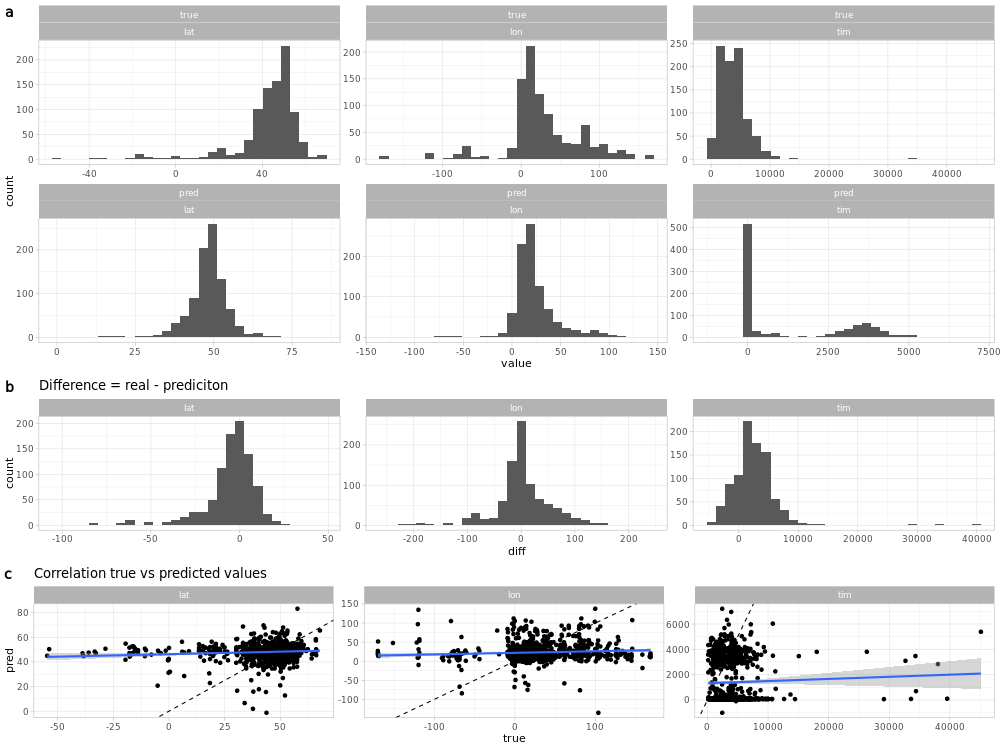

In [19]:
%%R -w 1000 -h 750

plot_grid(
    df %>%        
        ggplot() +
        #geom_histogram(aes(x = value, fill = pop), bins = 30) + 
        geom_histogram(aes(x = value), bins = 30) + 
        #geom_vline(data = . %>% group_by(pop, stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        #geom_vline(data = . %>% group_by(stat, truepred) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(truepred~stat, scales = "free") +
        theme_light(),
    df %>%
        spread(truepred, value) %>%
        mutate(diff = true - pred) %>%
        ggplot() +
        geom_histogram(aes(x = diff), bins = 30) + 
        #geom_histogram(aes(x = diff, fill = pop), bins = 30) + 
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(diff)), aes(xintercept = mean, color = pop)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = real - prediciton"),
    df %>%
        spread(truepred, value) %>%
        ggplot() +
        #geom_hline(data = . %>% group_by(stat) %>% summarize(mean = mean(true)), aes(yintercept = mean), linetype = "dashed") +
        #geom_point(aes(x = true, y = pred, color = pop)) +
        geom_point(aes(x = true, y = pred)) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true, y = pred)) +
        #geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                             mean_true = mean(true),
        #                                                             se_pred   = 1.96*(sd(pred)/sqrt(n())),
        #                                                             se_true   = 1.96*(sd(true)/sqrt(n()))), 
        #              aes(x = mean_true, ymin = mean_pred-se_pred, ymax = mean_pred+se_pred)) +
        #geom_errorbar(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                             mean_true = mean(true),
        #                                                             se_pred   = 1.96*(sd(pred)/sqrt(n())),
        #                                                             se_true   = 1.96*(sd(true)/sqrt(n()))), 
        #              aes(y = mean_pred, xmin = mean_true-se_true, xmax = mean_true+se_true)) +
        #geom_point(data = . %>% group_by(pop, stat) %>% summarize(mean_pred = mean(pred), 
        #                                                          mean_true = mean(true)), 
        #           aes(x = mean_true, y = mean_pred, fill = pop), shape = 22, size = 5) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto", rel_heights = c(2, 1, 1)
) -> plot

plot

#ggsave("true_pred.pdf", width = 20*2, height = 15*1.5, units = "cm")

plot

In [54]:
%%R

df %>% 
    #group_by(pop, stat) %>%
    spread(truepred, value) %>%
    summarize(mean_pred = mean(pred), mean_true = mean(true), mean_diff = mean(true-pred), sqrtdiff = mean(sqrt((true-pred)^2))) %>%
    as.data.frame() %>%
    print()

  mean_pred mean_true mean_diff sqrtdiff
1  486.9991  1367.575  880.5763 1108.402


In [55]:
%%R

get_diff_data <- function(exp, cro, sta, end){
    if(exp == 10000){
        read.table(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = ""), header = T) %>%
            mutate(cro = cro, sta = sta, end = end) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon)) %>%
            rename(space = diff_space) %>%
            gather("stat", "value", c(space)) %>% 
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2), by = c("ind"))
    }else if(exp == 20000){
        read.table(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = ""), header = T) %>%
            mutate(cro = cro, sta = sta, end = end) %>%
            select(-c(true_tim,  pred_tim)) %>%
            rename(time = diff_time) %>%
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2), by = c("ind"))
    }else{
        read.table(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = ""), header = T) %>%
        
            mutate(cro = cro, sta = sta, end = end,
                   extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>%
            rename(time = diff_time, space = diff_space) %>%
            gather("stat", "value", c(time, space)) %>% 
            left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2), by = c("ind"))
    }
}

    

get_diff_data(2, 1, "10000000", "20000000") %>%
    head()

   sim exp     nam typ gro        ind  idx  snp     run cro      sta      end
1 AADR   2 general  gt   0     KNE003  554 4463 4.43607   1 10000000 20000000
2 AADR   2 general  gt   0     I15978  834 4463 4.43607   1 10000000 20000000
3 AADR   2 general  gt   0     I10266 1872 4463 4.43607   1 10000000 20000000
4 AADR   2 general  gt   1     I13710 1011 4463 4.43288   1 10000000 20000000
5 AADR   2 general  gt   1     I20071 2468 4463 4.43288   1 10000000 20000000
6 AADR   2 general  gt   1 TU905_SX18 3757 4463 4.43288   1 10000000 20000000
            extendedexp stat       value datmea datstd              countr
1 2_1_10000000_20000000 time  -496.93701   3971     51     Czech__Republic
2 2_1_10000000_20000000 time -2641.83032    959     32 Dominican__Republic
3 2_1_10000000_20000000 time   -93.03223   3462     62              Israel
4 2_1_10000000_20000000 time   268.82935   3252     59     United__Kingdom
5 2_1_10000000_20000000 time  -913.81665   2749      8             Moldova
6 2_

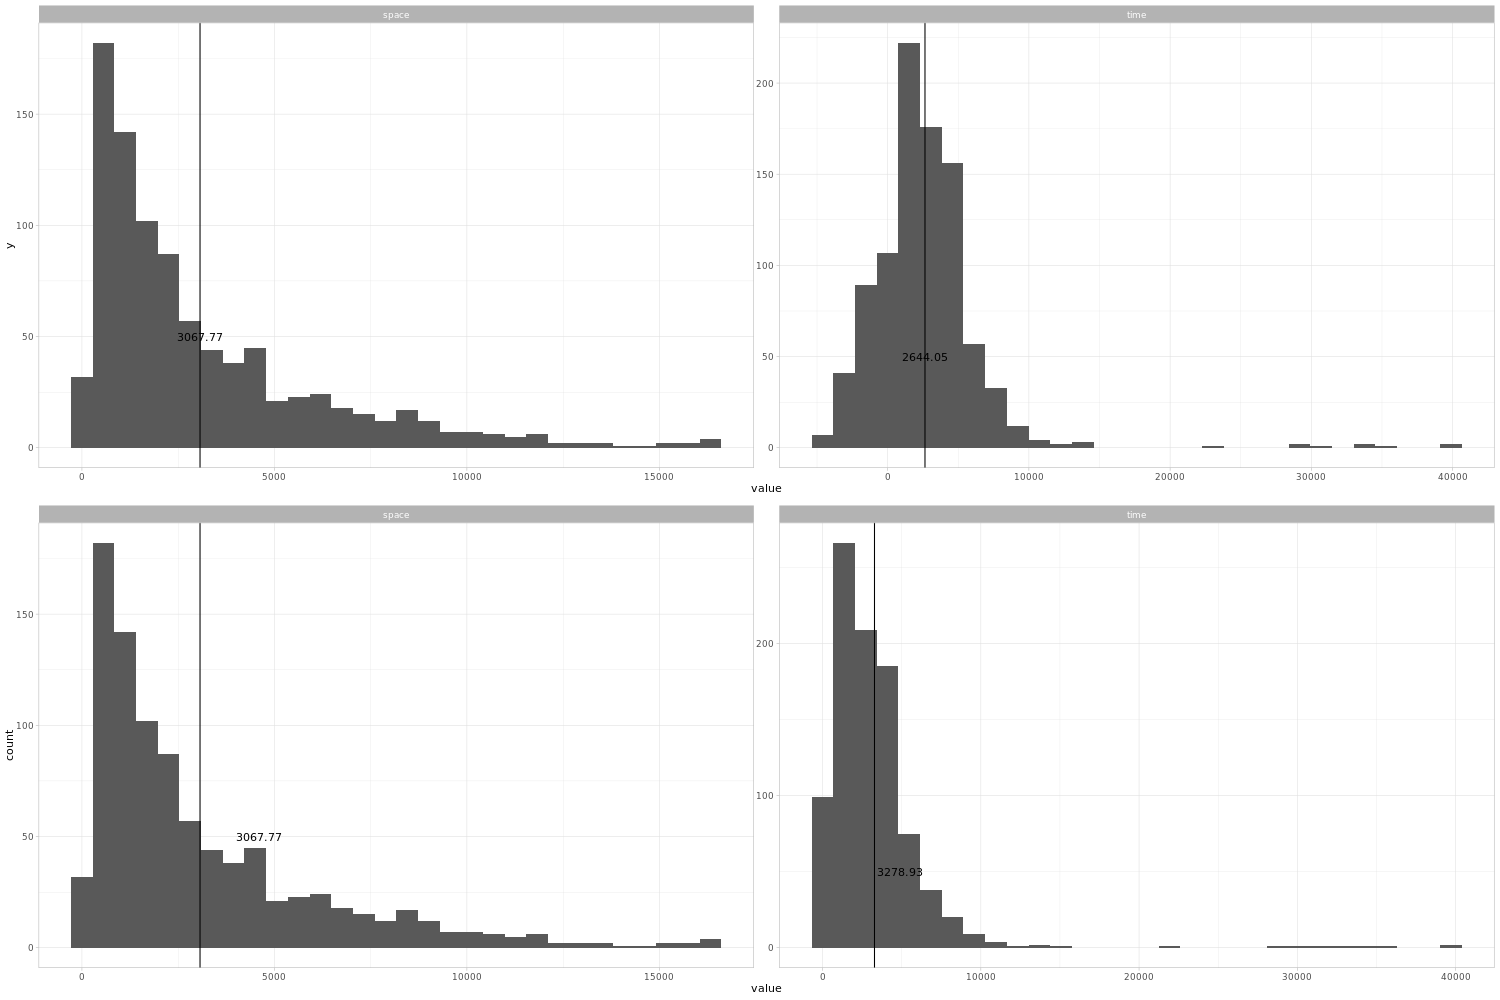

In [56]:
%%R -w 1500 -h 1000

exp = "2"
cro = "1"
sta = "10000000"
end = "20000000"

plot_grid(
    get_diff_data(exp, cro, sta, end) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean, y = 50, label = round(mean, 2))) +
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +    
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    get_diff_data(exp, cro, sta, end) %>%
        mutate(value = sqrt(value^2)) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        #geom_vline(data = . %>% group_by(pop, stat) %>% summarize(mean = mean(value)), aes(xintercept = mean, color = pop)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean+(mean*0.5), y = 50, label = round(mean, 2))) +
        ylab("count") +
        #scale_color_manual(values=col_pop) +
        #scale_fill_manual(values=col_pop) +
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    nrow = 2) -> plot

plot

#ggsave("diff.pdf", width = 20*1.5, height = 15*1.5, units = "cm")

#plot

In [57]:
%%R

error_spaceNNtime_all_scenarios <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
    #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        end = experiments %>% pull(end) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        all_scenarios = rbind(all_scenarios, 
                              get_diff_data(exp, cro, sta, end) %>%
                                  mutate(value = abs(value)) %>%
                                  group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
                                  summarize(mean = mean(value),
                                            se   = sd(value)/sqrt(n())) %>%
                                  mutate(exp = factor(exp))
                             )
            
    }
    all_scenarios
}

all_scenarios <- error_spaceNNtime_all_scenarios()
head(all_scenarios)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
# A tibble: 6 × 10
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp     cro      sta      end extendedexp        nam   typ   stat   mean    se
  <fct> <int>    <int>    <int> <chr>              <chr> <chr> <chr> <dbl> <dbl>
1 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    space 3250.  88.3
2 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    time  2100.  97.1
3 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    space 3068. 100. 
4 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    time  3279. 121. 
5 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    space 3015.  88.4
6 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    time  3936. 111. 


In [98]:
%%R

get_all_data <- function(exp, cro, sta, end){
    read.table(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = ""), header = T) %>%
        mutate(cro = cro, 
               sta = sta, 
               end = end,
               extendedexp = paste(exp, cro, sta, end, sep = "_")) %>%
        left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
            select(ind = indivi, datmea, datstd, countr, source, covera, snps12, assess, warnin,  datme2), by = c("ind"))
}


error_spaceNNtime_mean_windows <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") %>% 
        filter(exp == 2, !(sta == 0 && end == 100000000)) -> experiments

    
    all_scenarios = data.frame()
    
    for(i in 1:(experiments %>% nrow())){
        exp = experiments %>% pull(exp) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        end = experiments %>% pull(end) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        
        all_scenarios = rbind(all_scenarios, 
                              get_all_data(exp, cro, sta, end)
                             )
            
    }
    all_scenarios %>%
        group_by(sim, exp, ind, cro) %>%
        summarize(sta = min(sta),
                  end = max(end),
                  true_lat = mean(true_lat),
                  true_lon = mean(true_lon),
                  pred_lat = mean(pred_lat),
                  pred_lon = mean(pred_lon),
                  true_tim = mean(true_tim),
                  pred_tim = mean(pred_tim))
        
        
}

error_spaceNNtime_mean_windows() %>%
    mutate(space = haversine(true_lat, true_lon, pred_lat, pred_lon),
           time  = sqrt((pred_tim-true_tim)^2),
           extendedexp = paste(exp, cro, sta, end, sep = "_"),
           nam = "mean",
           typ = "gt") %>%
    as.data.frame() %>%
    select(-c(sim, true_lat, true_lon, pred_lat, pred_lon, true_tim, pred_tim)) %>%
    gather("stat", "diff", space, time) %>%
    group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
    summarize(mean = mean(diff), se = sd(diff)/sqrt(n())) %>%
    filter(sta == 0) -> mean_scenarios

head(mean_scenarios)

# A tibble: 2 × 10
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
    exp   cro   sta       end extendedexp     nam   typ   stat   mean    se
  <int> <int> <int>     <int> <chr>           <chr> <chr> <chr> <dbl> <dbl>
1     2     1     0 100000000 2_1_0_100000000 mean  gt    space 2871.  93.3
2     2     1     0 100000000 2_1_0_100000000 mean  gt    time  3071. 116. 


In [99]:
%%R

all_scenarios %>%
    head()

# A tibble: 6 × 10
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp     cro      sta      end extendedexp        nam   typ   stat   mean    se
  <fct> <int>    <int>    <int> <chr>              <chr> <chr> <chr> <dbl> <dbl>
1 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    space 3250.  88.3
2 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    time  2100.  97.1
3 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    space 3068. 100. 
4 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    time  3279. 121. 
5 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    space 3015.  88.4
6 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    time  3936. 111. 


In [100]:
%%R

mean_scenarios %>%
    head()

# A tibble: 2 × 10
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
    exp   cro   sta       end extendedexp     nam   typ   stat   mean    se
  <int> <int> <int>     <int> <chr>           <chr> <chr> <chr> <dbl> <dbl>
1     2     1     0 100000000 2_1_0_100000000 mean  gt    space 2871.  93.3
2     2     1     0 100000000 2_1_0_100000000 mean  gt    time  3071. 116. 


In [101]:
%%R

rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()) %>% head()

# A tibble: 6 × 10
  exp     cro      sta      end extendedexp        nam   typ   stat   mean    se
  <fct> <int>    <int>    <int> <chr>              <chr> <chr> <chr> <dbl> <dbl>
1 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    space 3250.  88.3
2 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    time  2100.  97.1
3 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    space 3068. 100. 
4 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    time  3279. 121. 
5 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    space 3015.  88.4
6 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    time  3936. 111. 


In [93]:
%%R

plot_errors <- function(all_scenarios_all, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "space") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels = labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot1
    
    if(ylimspace[1] != "None"){
        plot1 + coord_cartesian(ylim = ylimspace) -> plot1
    }
    if(nolegend){
        plot1 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot1
    }
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "time") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot1, plot2, ncol = 1, rel_heights=c(0.1, 1, 1))

}

In [67]:
%%R

all_scenarios %>%
    as.data.frame() %>%
    head()

  exp cro      sta      end           extendedexp     nam typ  stat     mean
1   1   1 10000000 20000000 1_1_10000000_20000000    loss  gt space 3250.499
2   1   1 10000000 20000000 1_1_10000000_20000000    loss  gt  time 2100.013
3   2   1 10000000 20000000 2_1_10000000_20000000 general  gt space 3067.775
4   2   1 10000000 20000000 2_1_10000000_20000000 general  gt  time 3278.931
5   3   1 10000000 20000000 3_1_10000000_20000000    loss  gt space 3014.508
6   3   1 10000000 20000000 3_1_10000000_20000000    loss  gt  time 3935.551
         se
1  88.26386
2  97.11285
3 100.25184
4 121.27727
5  88.36175
6 111.47139


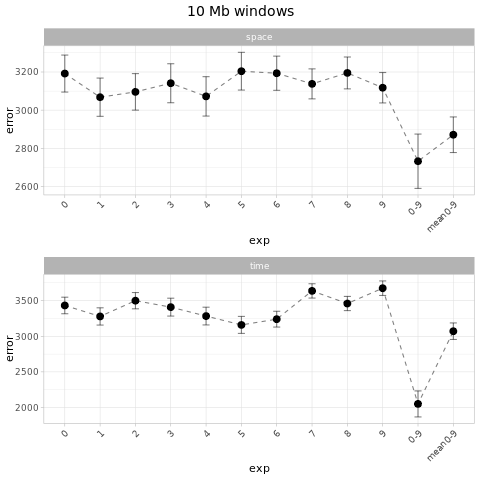

In [102]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_0_10000000",       "2_1_10000000_20000000",       "2_1_20000000_30000000",       "2_1_30000000_40000000",       "2_1_40000000_50000000",       "2_1_50000000_60000000",       "2_1_60000000_70000000",       "2_1_70000000_80000000",       "2_1_80000000_90000000",       "2_1_90000000_100000000",       "4_1_0_100000000",         "2_1_0_100000000"), 
            labels            = c("2_1_0_10000000" = "0", "2_1_10000000_20000000" = "1", "2_1_20000000_30000000" = "2", "2_1_30000000_40000000" = "3", "2_1_40000000_50000000" = "4", "2_1_50000000_60000000" = "5", "2_1_60000000_70000000" = "6", "2_1_70000000_80000000" = "7", "2_1_80000000_90000000" = "8", "2_1_90000000_100000000" = "9", "4_1_0_100000000" = "0-9", "2_1_0_100000000" = "mean0-9"), 
            limits            = c("2_1_0_10000000",       "2_1_10000000_20000000",       "2_1_20000000_30000000",       "2_1_30000000_40000000",       "2_1_40000000_50000000",       "2_1_50000000_60000000",       "2_1_60000000_70000000",       "2_1_70000000_80000000",       "2_1_80000000_90000000",       "2_1_90000000_100000000",       "4_1_0_100000000",         "2_1_0_100000000"),  
            title             = "10 Mb windows", 
            xlab              = "exp", 
            ylab              = "error")


In [61]:
%%R

all_scenarios %>%
    head()

# A tibble: 6 × 10
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp     cro      sta      end extendedexp        nam   typ   stat   mean    se
  <fct> <int>    <int>    <int> <chr>              <chr> <chr> <chr> <dbl> <dbl>
1 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    space 3250.  88.3
2 1         1 10000000 20000000 1_1_10000000_2000… loss  gt    time  2100.  97.1
3 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    space 3068. 100. 
4 2         1 10000000 20000000 2_1_10000000_2000… gene… gt    time  3279. 121. 
5 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    space 3015.  88.4
6 3         1 10000000 20000000 3_1_10000000_2000… loss  gt    time  3936. 111. 


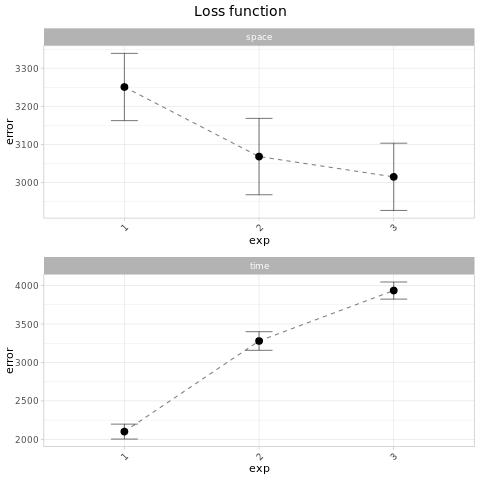

In [62]:
%%R

plot_errors(all_scenarios_all = all_scenarios, 
            exp_to_plot       = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"), 
            labels            = c("1_1_10000000_20000000" = "1", "2_1_10000000_20000000" = "2", "3_1_10000000_20000000" = "3"), 
            limits            = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"),  
            title             = "Loss function", 
            xlab              = "exp", 
            ylab              = "error")

In [63]:
%%R



NULL


In [64]:
%%R -w 1300 -h 1125

filter_pop  = c()
exp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 10)
labels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", 
                "8" = "mse", "10" = "edl")
limits      = c("1", "2", "3", "4", "5", "6", "8", "10")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "") -> p1
    
filter_pop  = c()
exp_to_plot = c(12, 13, 14, 5, 15, 16, 17)
labels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)
limits      = c("17", "16", "15", "5", "14", "13", "12")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", c(225, 1250), c(0, 7000)) -> p2

filter_pop  = c()
exp_to_plot = c(5, 18)
labels      = c("5" = "unif", "18" = "exp")
limits      = c("5", "18")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "") -> p3

filter_pop  = c()
exp_to_plot = c(5, 19, 20, 21, 22)
labels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")
limits      = c("22", "21", "20", "19", "5")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", c(225, 1250), c(0, 7000)) -> p4

filter_pop  = c()
exp_to_plot = c(5, 23, 24)
labels      = c("5" = "sNNt", "23" = "space", "24" = "time")
limits      = c()
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "") -> p5

filter_pop  = c()
exp_to_plot = c(5, 25, 26, 27)
labels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")
limits      = c("5", "25", "26", "27")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "") -> p6

#----------------------------------------------------------------------------

filter_pop  = c()
exp_to_plot = c(5, 28, 29, 30, 31)
labels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")
limits      = c("5", "28", "29", "30", "31")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", c(300, 1400), c(900, 8750)) -> p7

filter_pop  = c()
exp_to_plot = c(5, 33, 34, 35, 36)
labels      = c("5" = "GT", "33" = "1x", "34" = "5x", "35" = "15x", "36" = "30x", "37" = "30x Norm1")
limits      = c("5", "33", "34", "35", "36")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "") -> p8

filter_pop  = c()
exp_to_plot = c(5, 38, 39, 40, 41)
labels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")
limits      = c("5", "38", "39", "40", "41")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", c(300, 1400), c(900, 8750)) -> p9

filter_pop  = c()
exp_to_plot = c(5, 43, 44, 45, 46)
labels      = c("5" = "GT", "43" = "1x", "44" = "5x", "45" = "15x", "46" = "30x", "47" = "30x Norm1")
limits      = c("5", "43", "44", "45", "46")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "") -> p10

filter_pop  = c()
exp_to_plot = c(5, 48, 49, 50, 51)
labels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")
limits      = c("5", "48", "49", "50", "51")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", c(300, 1400), c(900, 8750)) -> p11

filter_pop  = c()
exp_to_plot = c(5, 48, 38, 52, 53, 54, 55, 56)
labels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1sd", "52" = "1sdcov", "53" = "5sd", "54" = "5sdcov", "55" = "10sd", "56" = "10sdcov")
limits      = c("5", "48", "38", "52", "53", "54", "55", "56")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", c(300, 1400), c(900, 8750)) -> p12

filter_pop  = c()
exp_to_plot = c(5, 49, 39, 57, 58, 59, 60, 61)
labels      = c("5" = "GT", "49" = "1xGP>GT", "39" = "1sd", "57" = "1sdcov", "58" = "5sd", "59" = "5sdcov", "60" = "10sd", "61" = "10sdcov")
limits      = c("5", "49", "39", "57", "58", "59", "60", "61")
plot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "") -> p13



plot_grid(
    plot_grid(p1, p2, p4, p3, nrow = 1, rel_widths = c(8, 7, 5, 2)),
    plot_grid(p7, p9, p11, p12, p13, nrow = 1),
    ncol = 1
) -> plot

plot

ggsave("error_with_pop.pdf", width = 36, height = 26, units = "cm")

plot 

R[write to console]: Error in filter(., extendedexp %in% exp_to_plot, stat == "space") : 
  object 'all_scenarios_per_pop' not found




Error in filter(., extendedexp %in% exp_to_plot, stat == "space") : 
  object 'all_scenarios_per_pop' not found


RInterpreterError: Failed to parse and evaluate line '\nfilter_pop  = c()\nexp_to_plot = c(1, 2, 3, 4, 5, 6, 8, 10)\nlabels      = c("1" = "ws = 1", "2" = "ws = 1e1", "3" = "ws = 1e2", "4" = "ws = 1e3", "5" = "ws = 1e4", "6" = "ws = 1e5", \n                "8" = "mse", "10" = "edl")\nlimits      = c("1", "2", "3", "4", "5", "6", "8", "10")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Loss function", "", "") -> p1\n    \nfilter_pop  = c()\nexp_to_plot = c(12, 13, 14, 5, 15, 16, 17)\nlabels      = c("12" = 15000, "13" = 10000, "14" = 5000, "5" = 1500, "15" =  1000, "16" =   500, "17" =  250)\nlimits      = c("17", "16", "15", "5", "14", "13", "12")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sample size", "", "", c(225, 1250), c(0, 7000)) -> p2\n\nfilter_pop  = c()\nexp_to_plot = c(5, 18)\nlabels      = c("5" = "unif", "18" = "exp")\nlimits      = c("5", "18")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Sampl.", "", "") -> p3\n\nfilter_pop  = c()\nexp_to_plot = c(5, 19, 20, 21, 22)\nlabels      = c("5" = "100%", "19" = "75%", "20" = "50%", "21" = "25%", "22" = "10%")\nlimits      = c("22", "21", "20", "19", "5")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "SNP density", "", "", c(225, 1250), c(0, 7000)) -> p4\n\nfilter_pop  = c()\nexp_to_plot = c(5, 23, 24)\nlabels      = c("5" = "sNNt", "23" = "space", "24" = "time")\nlimits      = c()\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Predict.", "", "") -> p5\n\nfilter_pop  = c()\nexp_to_plot = c(5, 25, 26, 27)\nlabels      = c("5" = "64", "25" = "128", "26" = "256", "27" = "512")\nlimits      = c("5", "25", "26", "27")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Nº nodes", "", "") -> p6\n\n#----------------------------------------------------------------------------\n\nfilter_pop  = c()\nexp_to_plot = c(5, 28, 29, 30, 31)\nlabels      = c("5" = "GT", "28" = "1x", "29" = "5x", "30" = "15x", "31" = "30x", "32" = "30x Norm1")\nlimits      = c("5", "28", "29", "30", "31")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL)", "", "", c(300, 1400), c(900, 8750)) -> p7\n\nfilter_pop  = c()\nexp_to_plot = c(5, 33, 34, 35, 36)\nlabels      = c("5" = "GT", "33" = "1x", "34" = "5x", "35" = "15x", "36" = "30x", "37" = "30x Norm1")\nlimits      = c("5", "33", "34", "35", "36")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GL mix)", "", "") -> p8\n\nfilter_pop  = c()\nexp_to_plot = c(5, 38, 39, 40, 41)\nlabels      = c("5" = "GT", "38" = "1x", "39" = "5x", "40" = "15x", "41" = "30x", "42" = "30x Norm1")\nlimits      = c("5", "38", "39", "40", "41")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP)", "", "", c(300, 1400), c(900, 8750)) -> p9\n\nfilter_pop  = c()\nexp_to_plot = c(5, 43, 44, 45, 46)\nlabels      = c("5" = "GT", "43" = "1x", "44" = "5x", "45" = "15x", "46" = "30x", "47" = "30x Norm1")\nlimits      = c("5", "43", "44", "45", "46")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP mix)", "", "") -> p10\n\nfilter_pop  = c()\nexp_to_plot = c(5, 48, 49, 50, 51)\nlabels      = c("5" = "GT", "48" = "1x", "49" = "5x", "50" = "15x", "51" = "30x", "52" = "30x Norm1")\nlimits      = c("5", "48", "49", "50", "51")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP to GT)", "", "", c(300, 1400), c(900, 8750)) -> p11\n\nfilter_pop  = c()\nexp_to_plot = c(5, 48, 38, 52, 53, 54, 55, 56)\nlabels      = c("5" = "GT", "48" = "1xGP>GT", "38" = "1sd", "52" = "1sdcov", "53" = "5sd", "54" = "5sdcov", "55" = "10sd", "56" = "10sdcov")\nlimits      = c("5", "48", "38", "52", "53", "54", "55", "56")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 1xcov weight)", "", "", c(300, 1400), c(900, 8750)) -> p12\n\nfilter_pop  = c()\nexp_to_plot = c(5, 49, 39, 57, 58, 59, 60, 61)\nlabels      = c("5" = "GT", "49" = "1xGP>GT", "39" = "1sd", "57" = "1sdcov", "58" = "5sd", "59" = "5sdcov", "60" = "10sd", "61" = "10sdcov")\nlimits      = c("5", "49", "39", "57", "58", "59", "60", "61")\nplot_errors(all_scenarios_per_pop, all_scenarios_all, filter_pop, exp_to_plot, labels, limits, "Coverage (GP 5xcov weight)", "", "") -> p13\n\n\n\nplot_grid(\n    plot_grid(p1, p2, p4, p3, nrow = 1, rel_widths = c(8, 7, 5, 2)),\n    plot_grid(p7, p9, p11, p12, p13, nrow = 1),\n    ncol = 1\n) -> plot\n\nplot\n\nggsave("error_with_pop.pdf", width = 36, height = 26, units = "cm")\n\nplot \n'.
R error message: 'Error in filter(., extendedexp %in% exp_to_plot, stat == "space") : \n  object \'all_scenarios_per_pop\' not found'

In [ ]:
%%R -w 1000 -h 500

exp = "56"
sim = "europe"

set.seed(1234)

plot_grid(
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    #sample_n(100, replace = FALSE) %>%
    ggplot() +
    geom_sf(data = ne_countries(scale = "medium", returnclass = "sf")) +
    geom_segment(aes(x = pred_lon, xend = true_lon, y = pred_lat, yend = true_lat)) +
    geom_point(aes(x = true_lon, y = true_lat, color = pop, shape = "real"),  size = 3) +
    geom_point(aes(x = pred_lon, y = pred_lat, color = pop, shape = "pred"),  size = 3) +
    coord_sf(ylim = c(25, 65), xlim = c(-20, 80)) +
    xlab("Longitude (º)") +
    ylab("Latitude (º)") +
    theme_bw(),
read.table(paste("../../sandbox/", sim, "/", exp, "/pred.txt", sep = ""), header = T) %>%
    left_join(read.table(paste("../../data/", sim, "/metadata.txt", sep = ""), header = T) %>% select(ind = ind_id, pop), by = c("ind")) %>%
    filter(gro < 31) %>%
    select(sim, exp, nam, typ, gro, ind, pop, idx, snp, true_tim, pred_tim) %>%
    gather("truepred", "value", c(true_tim, pred_tim)) %>% 
    ggplot() +
    geom_segment(data = . %>% spread(truepred, value), aes(x = "pred_tim", xend = "true_tim", y = pred_tim, yend = true_tim)) +
    geom_point(aes(x = truepred, y = value, color = pop), size = 3) +
    theme_bw(),
              nrow = 1, rel_widths = c(4, 1))
    

In [ ]:
%%R

coveragevserror <- function(exp, ylim, title){
    get_diff_data(exp) %>%
        mutate(value = abs(value)) %>%
        left_join(read.table(paste("../../sandbox/europe/", exp, "/coverage.txt", sep = ""), header = T) %>% mutate(cov = co1+co2) %>% select(ind, cov), by = c("ind")) %>%
        ggplot() +
        geom_point(aes(x = value, y = cov)) +
        geom_smooth(method = "lm", formula = "y ~ x", aes(x = value, y = cov)) +
        ylab("Coverage") +
        xlab("Error") +
        coord_cartesian(ylim = ylim)+
        facet_wrap(.~stat, scales="free_x") -> scatterplot
    
    read.table(paste("../../sandbox/europe/", exp, "/coverage.txt", sep = ""), header = T) %>% 
        mutate(cov = co1+co2) %>% 
        select(ind, cov) %>%
        ggplot() +
        geom_histogram(aes(x = cov), bins = 50) + 
        theme(axis.text.y  = element_blank(),
              axis.title.y = element_blank(),
              axis.ticks.y = element_blank()) +
        facet_wrap("Coverage"~.) +
        coord_flip(xlim = ylim) -> hist_cov
    
    get_diff_data(exp) %>%
        mutate(value = abs(value)) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 50) +
        theme(axis.text.x  = element_blank(),
              axis.title.x = element_blank(),
              axis.ticks.x = element_blank()) +
        ggtitle(title) +
        facet_wrap(.~stat, scales="free_x") -> hist_err
    
    plot_grid(
        hist_err, 
        NULL,
        scatterplot,
        hist_cov,
        rel_widths  = c(4, 1),
        rel_heights = c(1, 4)
    )
}
    


In [ ]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("55", ylim = c(-1, 90), title = "1x 10sd"),
coveragevserror("56", ylim = c(-1, 90), title = "1x 10sd CovNN"))

In [ ]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("60", ylim = c(-1, 90), title = "5x 10sd"),
coveragevserror("61", ylim = c(-1, 90), title = "5x 10sd CovNN"))

In [ ]:
%%R -w 1000 -h 500

plot_grid(
coveragevserror("58", ylim = c(-1, 55), title = "5x 5sd"),
coveragevserror("60", ylim = c(-1, 55), title = "5x 10sd"))